In [1]:
# Etudiants : Omar Krichen et Zakaria Benbouzid / ENSIIE & M2QF
import random as rd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import math

# Data

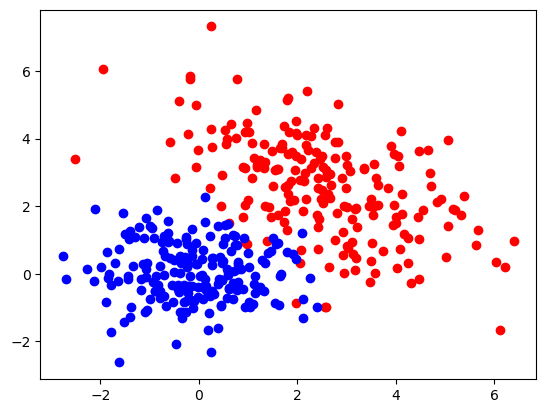

In [2]:
N=200
mean1 = [2.5, 2.5]
cov1 = [[2, -0.8], [-0.8, 2]] 

mean2 = [0, 0]
cov2 = [[1, 0], [0, 1]]

X1 = np.random.multivariate_normal(mean1, cov1, N) #Label Y=1
X2 = np.random.multivariate_normal(mean2, cov2, N) #Label Y=0

plt.scatter(X1[:, 0], X1[:, 1], label="Y = 1", c='r')
plt.scatter(X2[:, 0], X2[:, 1], label="Y = 0", c='b')

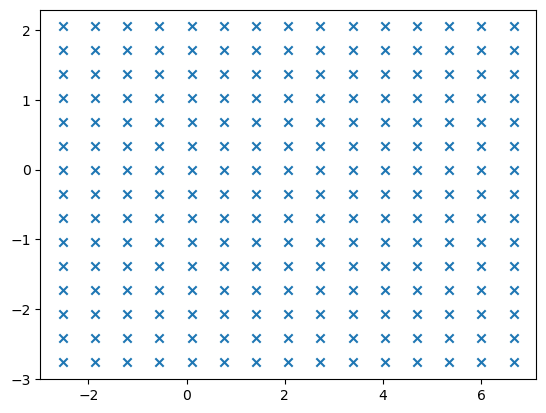

In [3]:
#Eval data
x1_min, x1_max = np.min(X1), np.max(X1)
x2_min, x2_max = np.min(X2), np.max(X2)
Neval=15; h1= (x1_max-x1_min)/Neval; h2=(x2_max-x2_min)/Neval
X1Eval, X2Eval= np.meshgrid(np.arange(x1_min, x1_max, h1), np.arange(x2_min, x2_max, h2));
plt.scatter(X1Eval, X2Eval, marker='x')

In [4]:
X_train=[x for x in X1]
Y_train=[1 for x in X1]
for i in range(len(X2)):
    X_train.append(X2[i])
    Y_train.append(0)
X_test=[]
for i in range(len(X1Eval)):
    for x,y in zip(X1Eval[i],X2Eval[i]):
        X_test.append([x,y])

# Classification Decision Tree

Text(0.5, 1.0, 'Limits of decision of DecisionTreeClassifier')

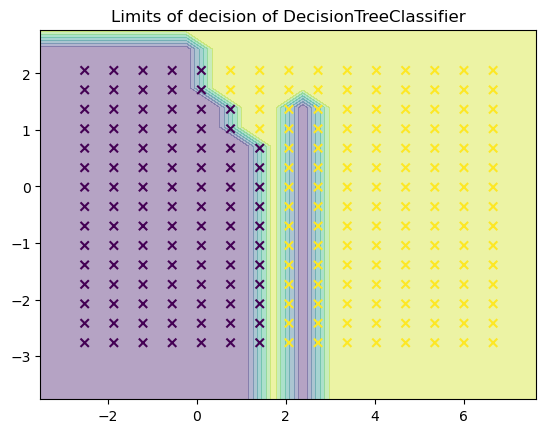

In [5]:
# Decision Tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

treeD = tree.DecisionTreeClassifier()
treefit = treeD.fit(X_train, Y_train);
pY_train=treefit.predict_proba(X_test);

#Score and decision on the training set
predxclass=np.argmax(pY_train,axis=1); 
#print(predxclass)


#Accuracy
#G=0
#for i in range(len(Y)):
#    if(Y[i]==predxclass[i]):
#        G+=1
#E_train=G/len(X)
#print(E_train)
r = export_text(treefit); 
#print(r)


#Decision boudaries
x=[t[0] for t in X_test]
y=[t[1] for t in X_test]
x_min, x_max = np.min(x) - 1, np.max(x) + 1
y_min, y_max = np.min(y) - 1, np.max(y) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h1), np.arange(y_min, y_max, h2))
Z = treeD.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x, y, c=predxclass, marker='x')

plt.title('Limits of decision of DecisionTreeClassifier')
#plt.show()

#Meta Parameters

# Bagging

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


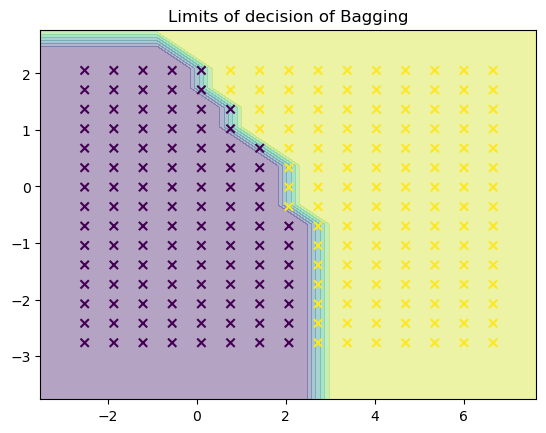

In [6]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.ensemble import BaggingClassifier
treemod = tree.DecisionTreeClassifier()
bagmod=BaggingClassifier(base_estimator=treemod, n_estimators=10, random_state=0)
bagmodfit=bagmod.fit(X_train, Y_train);
pY_train=bagmodfit.predict_proba(X_test);
#Score and decision on the training set
predxclass=np.argmax(pY_train,axis=1); #print(predclass)
#Decision boudaries
x=[t[0] for t in X_test]
y=[t[1] for t in X_test]
x_min, x_max = np.min(x) - 1, np.max(x) + 1
y_min, y_max = np.min(y) - 1, np.max(y) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h1), np.arange(y_min, y_max, h2))
Z = bagmod.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x, y, c=predxclass, marker='x')
plt.title('Limits of decision of Bagging')
plt.show()


#Meta parameters

# Random Forest

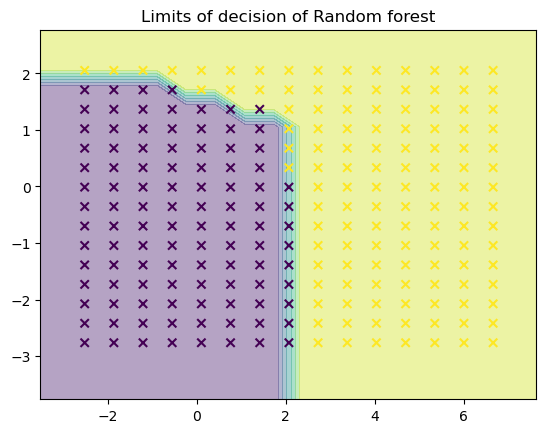

In [7]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
#tree = tree.DecisionTreeClassifier()
RF = RandomForestClassifier(max_depth=2, random_state=0)
RFfit = RF.fit(X_train, Y_train);
pY_train=RFfit.predict_proba(X_test);
#Score and decision computation on the training set
predxclass=np.argmax(pY_train,axis=1); #print(predclass)
score=RF.score;
#OOB=RF.oob_score_
#IF=RF.feature_importances_
#Decision boudaries
x=[t[0] for t in X_test]
y=[t[1] for t in X_test]
x_min, x_max = np.min(x) - 1, np.max(x) + 1
y_min, y_max = np.min(y) - 1, np.max(y) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h1), np.arange(y_min, y_max, h2))
Z = RF.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x, y, c=predxclass, marker='x')
plt.title('Limits of decision of Random forest')
plt.show()

# Extra Trees


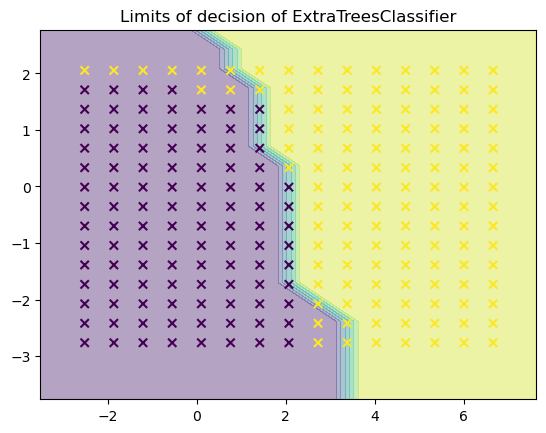

In [8]:
from sklearn.ensemble import ExtraTreesClassifier
ExTC = ExtraTreesClassifier(max_depth=2, random_state=0,bootstrap=True,oob_score=True)
ExTCfit = ExTC.fit(X_train, Y_train);
pY_train=ExTCfit.predict_proba(X_test);
score=ExTC.score;
OOB=ExTC.oob_score_
IF=ExTC.feature_importances_
#Decision boudaries
x=[t[0] for t in X_test]
y=[t[1] for t in X_test]
x_min, x_max = np.min(x) - 1, np.max(x) + 1
y_min, y_max = np.min(y) - 1, np.max(y) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h1), np.arange(y_min, y_max, h2))
Z = ExTC.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x, y, c=predxclass, marker='x')
plt.title('Limits of decision of ExtraTreesClassifier')
plt.show()

# EXERCICE TO DELIVER. Classification models for a real application: the Heart dataset.

In [9]:
#Application SA Heart
####################################
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, precision_score,recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
tab = pd.read_csv('SAheart.txt')
#np.shape(tab)


In [10]:
Y=tab["chd"]
Xnum=tab.loc[:,['sbp','tobacco','ldl','adiposity','typea','obesity','alcohol','age']]
X=Xnum.to_numpy();
models=["Decision Tree", "Bagging", "Random Forest", "Extra Trees"]
Accuracy=[]
Precision=[]
Recall=[]
F1=[]


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


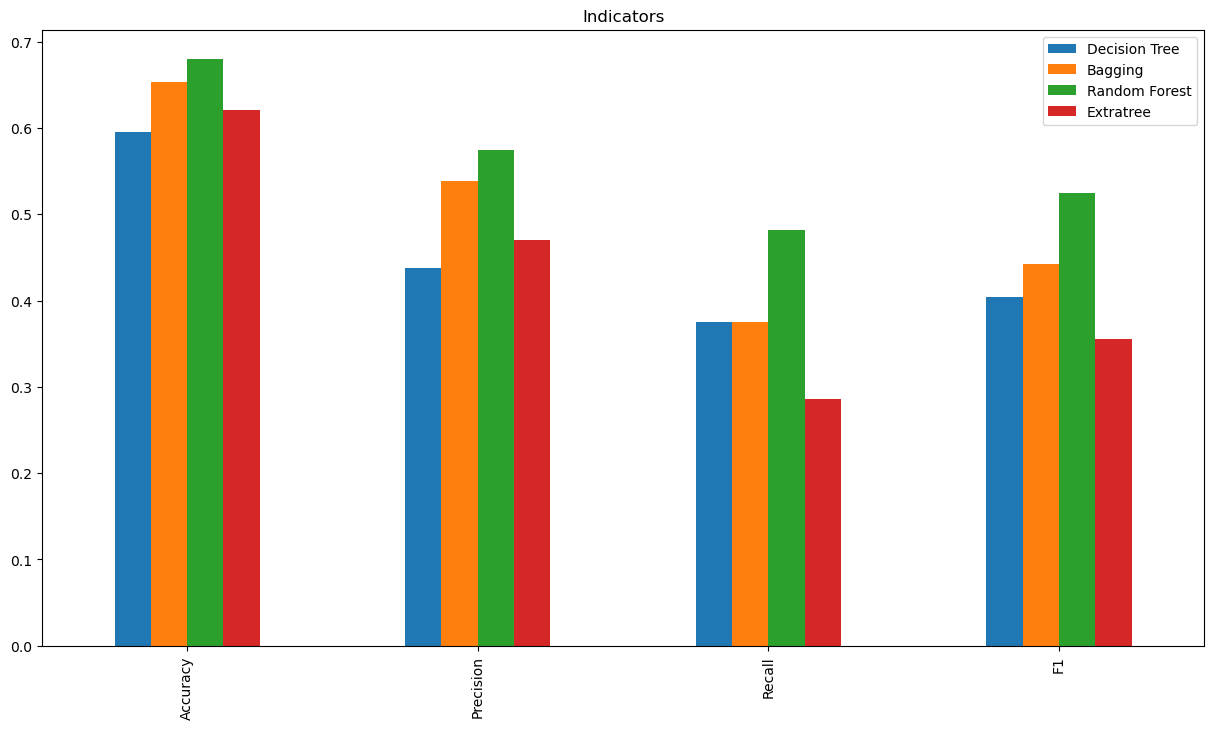

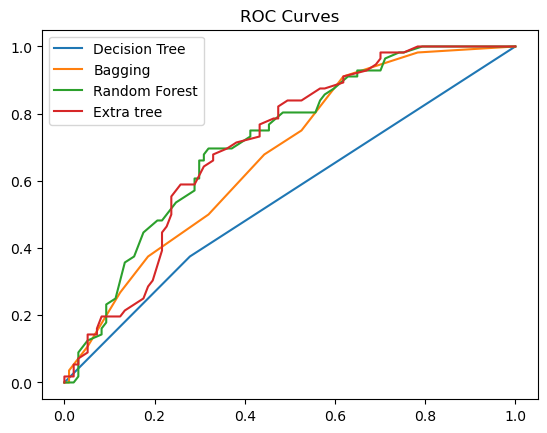

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
## Decision Tree
treeT = tree.DecisionTreeClassifier()
treefit = treeT.fit(X_train,y_train);
pY_train=treefit.predict_proba(X_test);
fpr_dec, tpr_dec, thresholds_dec = roc_curve(y_test,treefit.predict_proba(X_test)[:, 1])

#Score and decision on the training set
pred_tree=np.argmax(pY_train,axis=1);

Accuracy.append(accuracy_score(y_test, pred_tree))
Precision.append(precision_score(y_test, pred_tree))
Recall.append(recall_score(y_test, pred_tree))
F1.append(f1_score(y_test,pred_tree))


##Bagging
treemod = tree.DecisionTreeClassifier()
bagmod=BaggingClassifier(base_estimator=treemod, random_state=0)
bagmodfit=bagmod.fit(X_train, y_train);
pY_train=bagmodfit.predict_proba(X_test);
fpr_bag, tpr_bag, thresholds_bag = roc_curve(y_test, bagmodfit.predict_proba(X_test)[:, 1])
#Score and decision on the training set
pred_bagging=np.argmax(pY_train,axis=1); 

Accuracy.append(accuracy_score(y_test, pred_bagging))
Precision.append(precision_score(y_test, pred_bagging))
Recall.append(recall_score(y_test, pred_bagging))
F1.append(f1_score(y_test, pred_bagging))

##Random Forest
RF = RandomForestClassifier(random_state=0)
RFfit = RF.fit(X_train, y_train);
pY_train=RFfit.predict_proba(X_test);
fpr_for, tpr_for, thresholds_for = roc_curve(y_test, RFfit.predict_proba(X_test)[:, 1])
#Score and decision computation on the training set
pred_RF=np.argmax(pY_train,axis=1); 

Accuracy.append(accuracy_score(y_test, pred_RF))
Precision.append(precision_score(y_test, pred_RF))
Recall.append(recall_score(y_test, pred_RF))
F1.append(f1_score(y_test, pred_RF))

##Extratree
ExTC = ExtraTreesClassifier(random_state=0,bootstrap=True,oob_score=True)
ExTCfit = ExTC.fit(X_train, y_train);
pY_train=ExTCfit.predict_proba(X_test);
pred_ExTC=np.argmax(pY_train,axis=1); 
fpr_ext, tpr_ext, thresholds_ext = roc_curve(y_test, ExTCfit.predict_proba(X_test)[:, 1])

Accuracy.append(accuracy_score(y_test, pred_ExTC))
Precision.append(precision_score(y_test, pred_ExTC))
Recall.append(recall_score(y_test, pred_ExTC))
F1.append(f1_score(y_test, pred_ExTC))


plotdata = pd.DataFrame({
    
    "Decision Tree":[Accuracy[0],Precision[0],Recall[0],F1[0]],

    "Bagging":[Accuracy[1],Precision[1],Recall[1],F1[1]],

    "Random Forest":[Accuracy[2],Precision[2],Recall[2],F1[2]],
    
    "Extratree":[Accuracy[3],Precision[3],Recall[3],F1[3]]},

    index=["Accuracy", "Precision", "Recall", "F1"])

plotdata.plot(kind="bar",figsize=(15, 8))
plt.title("Indicators")
plt.show()


fig, ax = plt.subplots()
ax.plot(fpr_dec, tpr_dec,label="Decision Tree")
ax.plot(fpr_bag, tpr_bag,label="Bagging")
ax.plot(fpr_for, tpr_for,label="Random Forest")
ax.plot(fpr_ext, tpr_ext,label="Extra tree")
plt.title("ROC Curves")
ax.legend()
plt.show()
